In [49]:
import os
import sys
import json

data_files = os.listdir('.')
data_files = [f for f in data_files if f[:2] == '_g']

print(data_files)



['_greedyLagHeuristic_v1.txt', '_greedyHeuristic_v1.txt', '_greedyHeuristic_v2.txt']


In [52]:
import numpy as np

results = {}
out = {}

for fil in data_files:
    with open(fil, 'r') as f:
        res_values = {}
        tmp = f.readline()
        results[fil] = json.loads(tmp)
        for error_rate in results[fil]['files']:
            files = results[fil]['files'][error_rate]
            res_values[error_rate] = {}
            res_values[error_rate]['mean'] = np.mean(np.array([files[f]['quality'] for f in files]))

            #optimal solutions
            res_values[error_rate]['optimal'] = np.sum(np.array([1 for f in files if files[f]['quality'] == 1]))
            
            res_values[error_rate]['size'] = len([f for f in files])
        out[fil] = res_values

print(out)

{'_greedyLagHeuristic_v1.txt': {'5': {'mean': 0.5743790747384837, 'optimal': 0.0, 'size': 40}, '10': {'mean': 0.5851600427524751, 'optimal': 0.0, 'size': 40}, '20': {'mean': 0.6111529277172973, 'optimal': 0.0, 'size': 40}}, '_greedyHeuristic_v1.txt': {'5': {'mean': 0.5726619730608663, 'optimal': 0.0, 'size': 160}, '10': {'mean': 0.5838604429972565, 'optimal': 0.0, 'size': 160}, '20': {'mean': 0.5760029399869597, 'optimal': 0.0, 'size': 160}}, '_greedyHeuristic_v2.txt': {'5': {'mean': 0.8681680127137341, 'optimal': 103, 'size': 160}, '10': {'mean': 0.7584532560398782, 'optimal': 63, 'size': 160}, '20': {'mean': 0.6257712613028037, 'optimal': 19, 'size': 160}}}


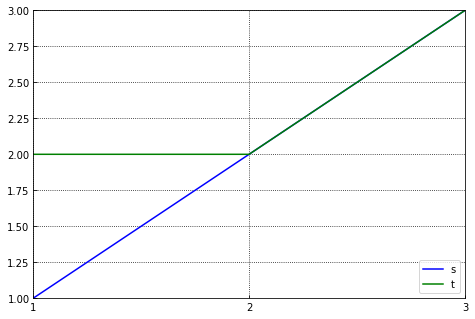

In [47]:
import matplotlib.pyplot as plt

colMarkers = ['bo', 'gv', 'rD', 'ks', 'md']

def plot_results(x_series, y_series, legendNames = None, xLabel='', yLabel='', xTicks=None, limits=None):
    __plot = plt.figure()
    a1 = __plot.add_axes([0, 0, 1, 1])

    j = 0
    for x_s, y_s in zip(x_series, y_series):
        a1.plot(x_s, y_s, str(colMarkers[j][0] + '-'))
        j += 1

        #legend
    a1.legend(labels = legendNames, loc = 'lower right')
    a1.set_xlabel(xLabel, fontsize = 14)
    
    a1.set_ylabel(yLabel, fontsize = 14)
    #grid
    a1.grid(color = 'k', ls = ':')
    #limits
    if limits is None:
        y_min = min([min(ser) for ser in y_series])
        y_max = max([max(ser) for ser in y_series])
        x_min = min([min(ser) for ser in x_series])
        x_max = max([max(ser) for ser in x_series])
    else:
        y_min = limits[2]
        y_max = limits[3]
        x_min = limits[0]
        x_max = limits[1]
    a1.set_ylim(y_min, y_max)
    a1.set_xlim(x_min, x_max)
    if xTicks is not None:
        a1.set_xticks(xTicks)
    #ticks
    
    a1.tick_params(direction = 'in')

    return __plot

tmp = plot_results([[1,2,3], [1,2,3]], [[1,2,3], [2,2,3]], xTicks=[1,2,3], legendNames=['s', 't'])
plt.show()